In [1]:
import numpy as np
a = np.arange(1, 16).reshape((3, 5)).T
a


array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [2]:
b = a[1:4:2]
b


array([[ 2,  7, 12],
       [ 4,  9, 14]])

In [3]:
from scipy import misc
face = misc.face()
face


array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

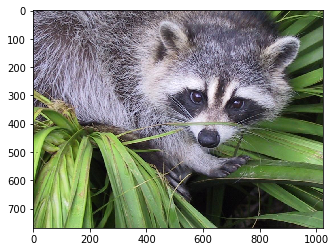

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(face) 


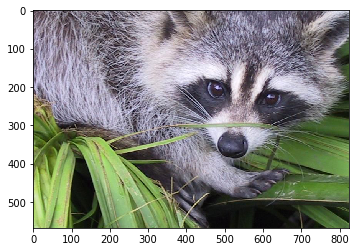

In [5]:
crop_face = face[100:-100, 100:-100]
plt.imshow(crop_face)


In [6]:
sy, sx, sz = face.shape
y, x = np.ogrid[0:sy, 0:sx]
y.shape, x.shape



((768, 1), (1, 1024))

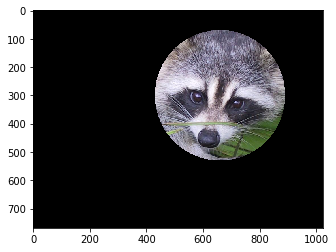

In [7]:
centerx, centery = (660, 300)
mask = ((y- centery)**2 + (x - centerx)**2) > 230**2
face = face.copy()
face[mask] = 0
plt.imshow(face)


In [8]:
data = np.loadtxt('population.txt')
data


array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [9]:
year, hares, lynxes, carrots = data.T
year


array([1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
       1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
       1918., 1919., 1920.])

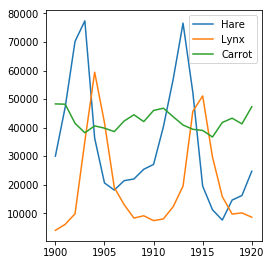

In [10]:
plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'))


/Users/nagatech/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
/Users/nagatech/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in square
  import sys
/Users/nagatech/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


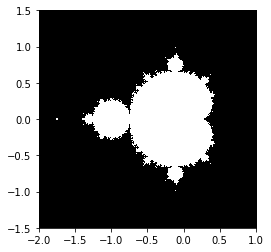

In [11]:
def compute_mandelbrot(N_max, some_threshold, nx, ny):
  x = np.linspace(-2, 1, nx)
  y = np.linspace(-1.5, 1.5, ny)
  c = x[:, np.newaxis]+ 1j*y[np.newaxis, :]
  z = 0
  for j in range(N_max):
    z = z**2 + c
  mandelbrot_set = (np.abs(z) < some_threshold)
  return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50, 1000, 1000)
plt.gray()
plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])


